In [ ]:
import json

with open('query-result.json', 'r') as file:
  data = json.loads(file.read())

NEARBY_AREAS = {
    'HWD': ['HAR', 'ENC', 'NRD'],
    'NHL': ['PLM']
}

populated_data = {}

for result in data['results']['bindings']:
  if 'date' in result:
    date = result['date']['value']
  else:
    continue

  # category = result['crimeCat']['value'].split('/')[-1]
  category = "PropertyCrime"
  acronym = result['acronym']['value']
  count_crime = int(result['count']['value'])

  obj_data = {
    "category" : category,
    "count": count_crime,
    "date" : date
  }

  if acronym in populated_data:
      populated_data[acronym].append(obj_data)
  else:
    populated_data[acronym] = [obj_data]


print(populated_data)

{'CCN': [{'category': 'PropertyCrime', 'count': 2, 'date': '2022-12-29'}, {'category': 'PropertyCrime', 'count': 3, 'date': '2022-12-28'}, {'category': 'PropertyCrime', 'count': 2, 'date': '2022-12-27'}, {'category': 'PropertyCrime', 'count': 7, 'date': '2022-12-26'}, {'category': 'PropertyCrime', 'count': 1, 'date': '2022-12-25'}, {'category': 'PropertyCrime', 'count': 9, 'date': '2022-12-24'}, {'category': 'PropertyCrime', 'count': 6, 'date': '2022-12-23'}, {'category': 'PropertyCrime', 'count': 9, 'date': '2022-12-22'}, {'category': 'PropertyCrime', 'count': 8, 'date': '2022-12-21'}, {'category': 'PropertyCrime', 'count': 11, 'date': '2022-12-20'}, {'category': 'PropertyCrime', 'count': 5, 'date': '2022-12-19'}, {'category': 'PropertyCrime', 'count': 14, 'date': '2022-12-18'}, {'category': 'PropertyCrime', 'count': 3, 'date': '2022-12-17'}, {'category': 'PropertyCrime', 'count': 11, 'date': '2022-12-16'}, {'category': 'PropertyCrime', 'count': 8, 'date': '2022-12-15'}, {'category': 

In [32]:
from datetime import datetime, timedelta

def generate_dates(start_date_str, end_date_str):
    start_date = datetime.strptime(start_date_str, '%Y-%m-%d')
    end_date = datetime.strptime(end_date_str, '%Y-%m-%d')

    current_date = start_date
    date_list = []

    while current_date <= end_date:
        date_list.append(current_date.strftime('%Y-%m-%d'))
        current_date += timedelta(days=1)

    return date_list

# Example usage
start_date_str = '2022-09-30'
end_date_str = '2023-10-30'
date_range = generate_dates(start_date_str, end_date_str)



In [ ]:
def fill_missing_dates(data, date_range):
    # Create a dictionary with counts for each date in the original data
    date_counts = {(entry['date'], entry['category']): entry['count'] for entry in data}

    # Iterate through the date_range and add missing dates with count zero
    for date in date_range:
        for category in set(entry['category'] for entry in data):
            key = (date, category)
            if key not in date_counts:
                data.append({'category': category, 'count': 0, 'date': date})

    # Sort the updated data by date
    data.sort(key=lambda x: (x['date'], x['category']))

    return data

correlation between HWD and HAR is : 0.14500159983326716
correlation between HWD and ENC is : 0.05271238852564455
correlation between HWD and NRD is : 0.06737397246773098


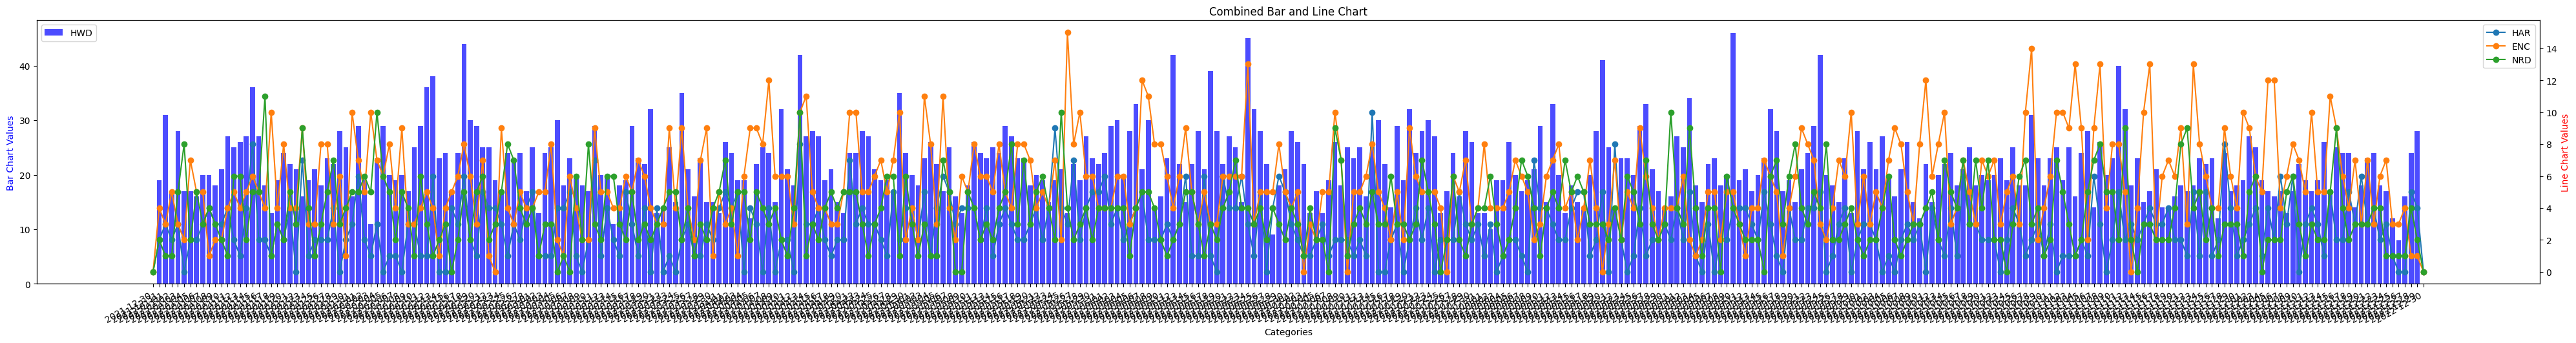

correlation between NHL and PLM is : 0.08271607176758017


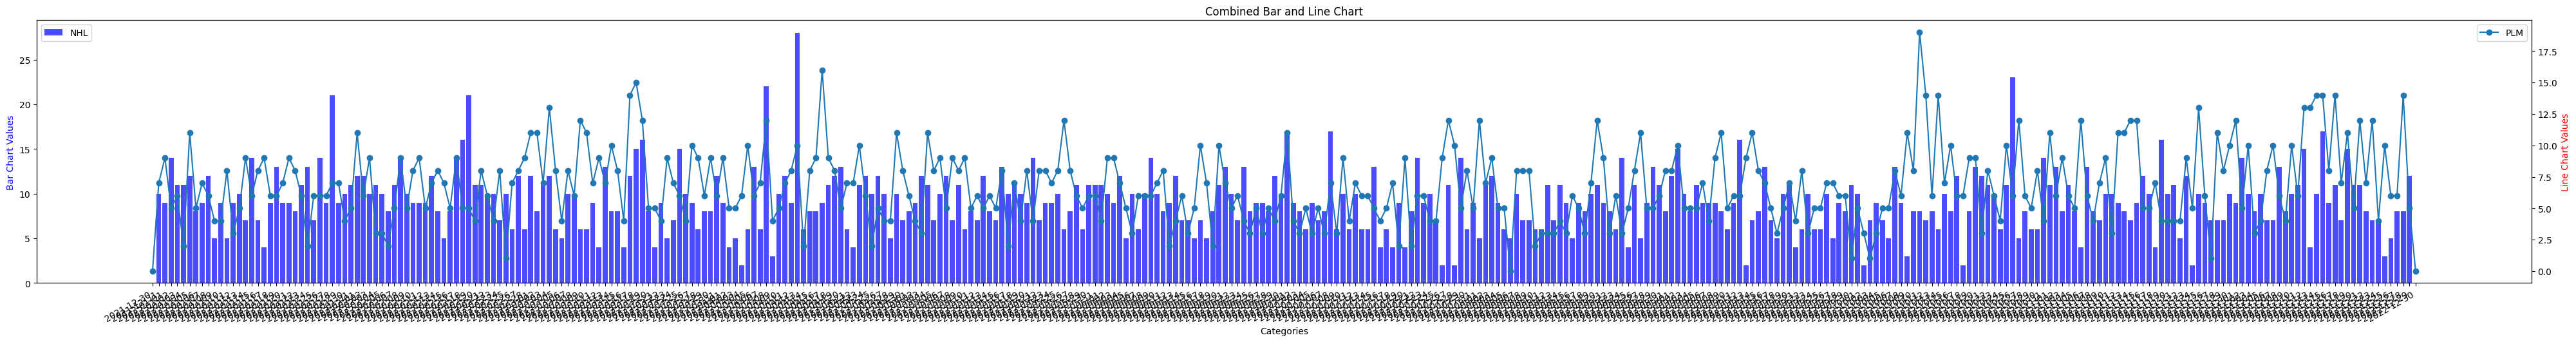

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

target_category = "PropertyCrime"
start_date_str = '2021-12-30'
end_date_str = '2022-12-30'
date_range = generate_dates(start_date_str, end_date_str)


for main_area in NEARBY_AREAS.keys():
  MAIN_AREA = fill_missing_dates(
      [entry for entry in sorted(populated_data[main_area], key=lambda x: x['date']) if entry['category'] == target_category],
      date_range
  )
  counts_HAR = [entry['count'] for entry in MAIN_AREA]

  fig, ax1 = plt.subplots(figsize=(50, 6))

  # Bar chart
  ax1.bar(date_range, counts_HAR, color='blue', alpha=0.7, label=main_area)
  ax2 = ax1.twinx()

  nearby_areas = NEARBY_AREAS[main_area]

  for ne_are in nearby_areas:
    AREA = fill_missing_dates(
        [entry for entry in sorted(populated_data[ne_are], key=lambda x: x['date']) if entry['category'] == target_category],
        date_range
    )
    counts_AREA = [entry['count'] for entry in AREA]
    print(f"correlation between {main_area} and {ne_are} is : {np.corrcoef(counts_HAR, counts_AREA)[0, 1]}")
    ax2.plot(date_range, counts_AREA, marker='o', label=ne_are)

  # Set labels and title
  ax1.set_xlabel('Categories')
  ax1.set_ylabel('Bar Chart Values', color='blue')
  ax2.set_ylabel('Line Chart Values', color='red')
  plt.title('Combined Bar and Line Chart')

  # Display the legend
  ax1.legend(loc='upper left')
  ax2.legend(loc='upper right')

  fig.autofmt_xdate()
  # Show the plot
  plt.show()

In [6]:
import json

with open('geo-result.json', 'r') as file:
  data = json.loads(file.read())


populated_data = {}

for result in data['results']['bindings']:
  if 'date' in result:
    date = result['date']['value']
  else:
    continue

  # category = result['crimeCat']['value'].split('/')[-1]
  category = "PropertyCrime"
  lat = float(result['lat']['value'])
  lon = float(result['lon']['value'])

  obj_data = {
    "lon" : lon,
    "lat": lat,
    "date" : date
  }

  if date in populated_data:
      populated_data[date].append(obj_data)
  else:
    populated_data[date] = [obj_data]


print(populated_data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Correlation with Nearby Areas' Variable: 0.9538209664765318
     Latitude  Longitude  Cluster                 geometry
0   -118.2442    34.0663       15  POINT (34.066 -118.244)
1   -118.2452    34.0455       15  POINT (34.045 -118.245)
2   -118.2312    34.0346       24  POINT (34.035 -118.231)
3   -118.2768    34.0695       14  POINT (34.069 -118.277)
4   -118.2744    34.0394        1  POINT (34.039 -118.274)
..        ...        ...      ...                      ...
267 -118.3215    34.0495       14  POINT (34.050 -118.322)
268 -118.3563    34.0736       26  POINT (34.074 -118.356)
269 -118.4502    34.2301       25  POINT (34.230 -118.450)
270 -118.2524    34.0224        1  POINT (34.022 -118.252)
271 -118.2781    33.9428        5  POINT (33.943 -118.278)

[272 rows x 4 columns]


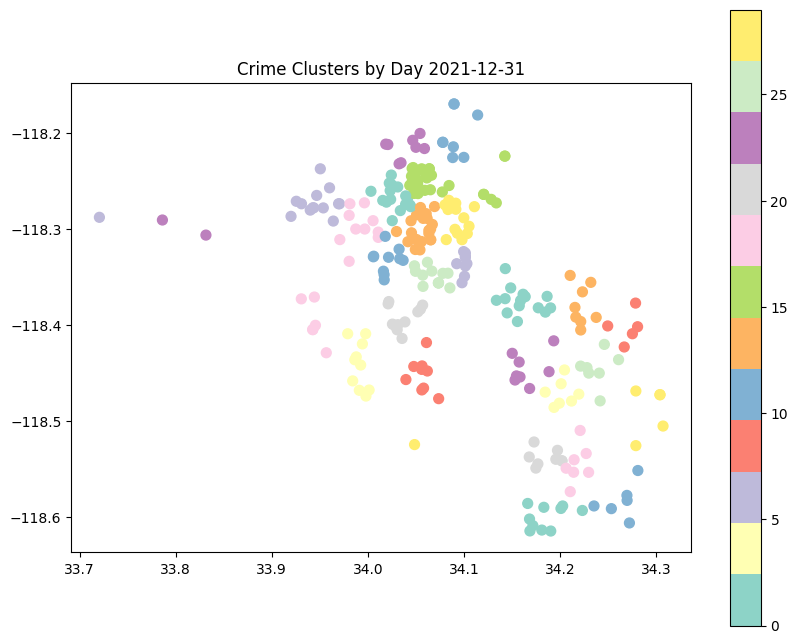

In [9]:
import pandas as pd
import geopandas as gpd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

day = "2021-12-31"
data = populated_data[day]

# Sample data (replace this with your dataset)
crime_data = {
    'Latitude': [entry['lon'] for entry in data],
    'Longitude': [entry['lat'] for entry in data],
}

crime_df = pd.DataFrame(crime_data)

scaler = StandardScaler()
crime_df_scaled = scaler.fit_transform(crime_df[['Longitude', 'Latitude']])

kmeans = KMeans(n_clusters=30, random_state=42)
crime_df['Cluster'] = kmeans.fit_predict(crime_df_scaled)
incident_counts = crime_df['Cluster'].value_counts().sort_index()


# print(incident_counts)

nearby_areas_variable = [14, 20, 10]  # Replace with your actual nearby areas' variable values
correlation = incident_counts.corr(pd.Series(nearby_areas_variable))

# Display results

print("\nCorrelation with Nearby Areas' Variable:", correlation)


gdf = gpd.GeoDataFrame(
    crime_df,
    geometry=gpd.points_from_xy(crime_df['Longitude'], crime_df['Latitude'])
)


print(gdf)

fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax, column='Cluster', legend=True, markersize=50, cmap='Set3')
plt.title(f'Crime Clusters by Day {day}')
plt.show()

In [34]:
import math
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

correlation_data = []

start_date_str = '2022-01-01'
end_date_str = '2022-12-30'
days = generate_dates(start_date_str, end_date_str)
print(days)
for day in days:
  if day not in populated_data:
    continue

  data = populated_data[day]

  # Sample data (replace this with your dataset)
  crime_data = {
      'Latitude': [entry['lon'] for entry in data],
      'Longitude': [entry['lat'] for entry in data],
  }

  # Determine the latitude and longitude ranges
  min_lon, max_lon = 33.70365562371134, 34.337311034156315
  min_lat, max_lat = -118.6505, -118.15536994052763

  # Dynamically create ten bounding boxes
  # Number of areas
  num_areas = 25
  boundries = int(math.sqrt(num_areas))

  # Calculate the boundaries of the areas
  area_width = (max_lon - min_lon) / boundries
  area_height = (max_lat - min_lat) / boundries

  bounding_boxes = {}

  # Plot the four areas
  for i in range(boundries):
      for j in range(boundries):
          box_name = f'Box{i + 1}-{j + 1}'
          x = min_lon + i * area_width
          y = min_lat + j * area_height

          bounding_boxes[box_name] = {
              'min_lon': x,
              'max_lon': x+area_width,
              'min_lat': y,
              'max_lat': y+area_height
        }


  # Function to assign crime incidents to boxes
  def assign_to_box(row):
      for box, bounds in bounding_boxes.items():
          if bounds['min_lon'] <= row['Longitude'] <= bounds['max_lon'] and \
            bounds['min_lat'] <= row['Latitude'] <= bounds['max_lat']:
              return box
      return 'Outside Boxes'

  crime_df = pd.DataFrame(crime_data)

  crime_df['Box'] = crime_df.apply(assign_to_box, axis=1)
  incident_counts = crime_df['Box'].value_counts().sort_index()
  correlation_data.append(
      (incident_counts['Box3-4'], [
          incident_counts['Box3-3'] if 'Box3-3' in incident_counts else 0,
          incident_counts['Box3-5'] if 'Box3-5' in incident_counts else 0,
          incident_counts['Box2-3'] if 'Box2-3' in incident_counts else 0,
          incident_counts['Box2-4'] if 'Box2-4' in incident_counts else 0,
          incident_counts['Box2-5'] if 'Box2-5' in incident_counts else 0,
          incident_counts['Box4-3'] if 'Box4-3' in incident_counts else 0,
          incident_counts['Box4-4'] if 'Box4-4' in incident_counts else 0,
          incident_counts['Box4-5'] if 'Box4-5' in incident_counts else 0
      ]),
  )

  # # Plot the bounding boxes and incidents
  # fig, ax = plt.subplots(figsize=(10, 8))

  # for box, bounds in bounding_boxes.items():
  #     box_data = crime_df[crime_df['Box'] == box]
  #     ax.plot(box_data['Longitude'], box_data['Latitude'], 's', label=box, markersize=5)

  #     rect = Rectangle(
  #         (bounds['min_lon'], bounds['min_lat']),
  #         bounds['max_lon'] - bounds['min_lon'], bounds['max_lat'] - bounds['min_lat'],
  #         linewidth=1, edgecolor='r', facecolor='none'
  #     )
  #     ax.add_patch(rect)

  # plt.title('Crime Incidents and Bounding Boxes')
  # plt.xlabel('Longitude')
  # plt.ylabel('Latitude')
  # plt.legend()
  # plt.show()


['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08', '2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12', '2022-01-13', '2022-01-14', '2022-01-15', '2022-01-16', '2022-01-17', '2022-01-18', '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22', '2022-01-23', '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28', '2022-01-29', '2022-01-30', '2022-01-31', '2022-02-01', '2022-02-02', '2022-02-03', '2022-02-04', '2022-02-05', '2022-02-06', '2022-02-07', '2022-02-08', '2022-02-09', '2022-02-10', '2022-02-11', '2022-02-12', '2022-02-13', '2022-02-14', '2022-02-15', '2022-02-16', '2022-02-17', '2022-02-18', '2022-02-19', '2022-02-20', '2022-02-21', '2022-02-22', '2022-02-23', '2022-02-24', '2022-02-25', '2022-02-26', '2022-02-27', '2022-02-28', '2022-03-01', '2022-03-02', '2022-03-03', '2022-03-04', '2022-03-05', '2022-03-06', '2022-03-07', '2022-03-08', '2022-03-09', '2022-03-10', '2022-03-11', '2022-03-12', '2022

In [35]:
import statsmodels.api as sm

# Prepare the data for regression analysis
box_1_numbers = [day[0] for day in correlation_data]  # Independent variable
neighbor_numbers = [list(neighbor) for _, neighbor in correlation_data]  # Dependent variables

# Perform linear regression for each neighbor
for i in range(len(neighbor_numbers[0])):
    Y = [neighbor[i] for neighbor in neighbor_numbers]  # Values for this neighbor across all days
    X = sm.add_constant(box_1_numbers)  # Add a constant term for the intercept
    model = sm.OLS(Y, X).fit()  # Perform the ordinary least squares regression

    print(f"Analysis for Neighbor {i+1}:")
    print(model.summary())
    print("\n")


363
Analysis for Neighbor 1:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     15.93
Date:                Fri, 08 Dec 2023   Prob (F-statistic):           7.94e-05
Time:                        11:14:58   Log-Likelihood:                -1219.0
No. Observations:                 363   AIC:                             2442.
Df Residuals:                     361   BIC:                             2450.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.8380  

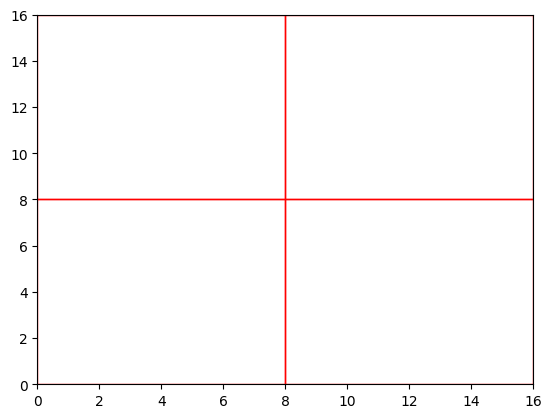

In [ ]:
import math
import matplotlib.pyplot as plt

# Number of areas
num_areas = 4
boundries = math.sqrt(num_areas)
# Minimum and maximum values for x and y
min_x, max_x = 0, 16
min_y, max_y = 0, 16

# Calculate the boundaries of the areas
area_width = (max_x - min_x) / boundries
area_height = (max_y - min_y) / boundries

# Create subplots
fig, ax = plt.subplots()

# Plot the four areas
for i in range(boundries):
    for j in range(boundries):
        x = min_x + i * area_width
        y = min_y + j * area_height
        rect = plt.Rectangle((x, y), area_width, area_height, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

# Set axis limits
plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)

# Show the plot
plt.show()
